# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crypto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57572.40
The current value of your 5.3 ETH is $19191.14


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
ALPACA_API_KEY = "PKIIND1JT8B4762GEXC4"
ALPACA_SECRET_KEY = "SU1QXQkno9GbigaeZ6g8z7TF6CIP1g2yPMGzwuSI"

# Create the Alpaca API object
alpaca = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-09-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_investments = alpaca.get_barset(tickers, timeframe, start=today, limit=1000).df

# Preview DataFrame
df_investments

AGG                                        \
                               open      high       low   close    volume   
time                                                                        
2020-09-14 00:00:00-04:00  118.4700  118.4900  118.3100  118.37  11279340   
2020-09-15 00:00:00-04:00  118.2900  118.4250  118.2900  118.38   3634512   
2020-09-16 00:00:00-04:00  118.5300  118.5300  118.2000  118.32   5190572   
2020-09-17 00:00:00-04:00  118.4201  118.5200  118.3300  118.36   4263541   
2020-09-18 00:00:00-04:00  118.3900  118.4400  118.1800  118.24   4548578   
...                             ...       ...       ...     ...       ...   
2021-09-09 00:00:00-04:00  115.8400  116.1470  115.7550  116.10   3232335   
2021-09-10 00:00:00-04:00  115.9900  116.0100  115.7801  115.87   2767552   
2021-09-13 00:00:00-04:00  116.0000  116.0750  115.9600  116.03   3289881   
2021-09-14 00:00:00-04:00  116.0700  116.3800  116.0700  116.28   4036304   
2021-09-15 00:00:00-04:00  116.2900  116.2929  116.0900  116.19   3348036   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-09-14 00:00:00-04:00  337.49  340.3800  334.2208  338.42  110083883  
2020-09-15 00:00:00-04:00  341.12  342.0200  338.4683  340.15   43908367  
2020-09-16 00:00:00-04:00  341.51  343.0600  338.5200  338.81   70521698  
2020-09-17 00:00:00-04:00  333.56  337.6996  332.9910  335.86   80778657  
2020-09-18 00:00:00-04:00  335.37  335.4900  327.9700  330.69   88780313  
...                           ...       ...       ...     ...        ...  
2021-09-09 00:00:00-04:00  450.70  452.5700  448.7200  448.94   51603442  
2021-09-10 00:00:00-04:00  451.04  451.4900  445.3100  445.50   75763259  
2021-09-13 00:00:00-04:00  448.65  448.9200  444.1100  446.56   75103627  
2021-09-14 00:00:00-04:00  448.12  448.3400  443.2200  444.18   67959711  
2021-09-15 00:00:00-04:00  444.62  448.4100  443.4400  447.87   69265024  

[254 rows x 10 columns]

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"][0])
spy_close_price = float(df_investments["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.37
Current SPY closing price: $338.42


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16921.00
The current value of your 200 AGG shares is $23674.00


### Savings Health Analysis

In [53]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [my_btc_value + my_eth_value, my_spy_value + my_agg_value]


# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns = ["amount"], index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,76763.541
shares,40595.000


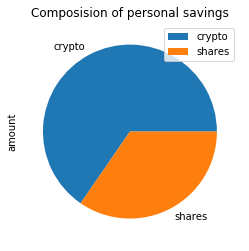

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composision of personal savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your savings goal!")
else:
    print(f"You still need {emergency_fund - total_savings}")


Congratulations! You have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
portfolio_data=df_stock_data, 
    weights=[0.4,0.6],
    num_simulation=500,
    num_trading_days=252*30
)


In [17]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/macbookpro15/Fintech_Material/monu-virt-fin-pt-08-2021-u-c/02-Homework/05-APIs/Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997542,0.998680,1.014360,0.994353,1.006793,0.998012,0.989676,0.986871,1.010947,1.013316,...,0.995696,0.989146,0.995952,1.008600,0.990687,0.987938,1.002674,1.002249,1.012833,0.992239
2,0.988503,0.993711,1.020669,1.004599,0.994328,0.992371,1.000171,0.992906,0.997504,1.014694,...,0.985379,0.989098,0.997044,1.007182,0.986384,0.987585,1.000440,0.993552,1.024852,0.997029
3,0.978702,0.996716,1.013533,1.004578,0.985398,0.998078,1.001599,0.995697,1.007256,1.016369,...,0.988016,0.987835,1.014490,0.993434,0.987583,0.990643,0.994934,0.988640,1.027821,1.012960
4,0.982753,0.983269,1.016895,1.005835,0.990702,0.999662,1.008892,0.998224,1.001633,1.027562,...,0.989421,0.989925,1.011886,0.977708,0.984677,0.998216,1.000143,0.987107,1.014905,1.014160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,34.692950,27.427466,9.600955,59.189137,37.058749,65.097158,29.621628,20.746956,5.665628,38.641952,...,97.574900,16.026647,32.901556,42.979684,12.847404,14.072448,10.490540,6.342203,60.923149,105.971545
7557,34.574435,27.661800,9.521699,59.394715,37.246626,64.716829,29.512767,21.038922,5.651656,38.817656,...,98.983173,15.918166,32.807755,42.618380,12.963565,14.332892,10.420554,6.387450,61.140694,106.248475
7558,34.717501,27.396809,9.424762,59.159565,37.680720,64.533214,29.568134,21.080812,5.627217,38.765216,...,97.309300,15.837781,32.712467,42.632414,12.793968,14.448429,10.421579,6.340454,60.755865,106.346560
7559,34.183680,27.229735,9.496052,58.987433,37.672449,65.096492,29.213674,20.974936,5.666757,38.526363,...,98.360537,15.658414,32.531473,42.480838,12.750892,14.361859,10.498562,6.307076,60.602536,107.038726


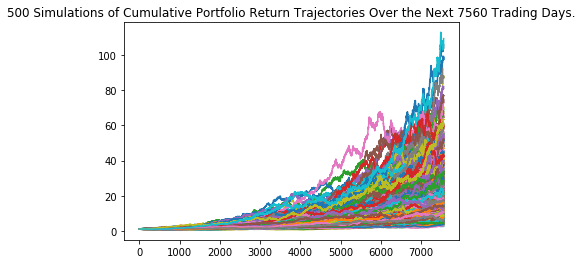

In [19]:
# Plot simulation outcomes
MC_30years.plot_simulation()

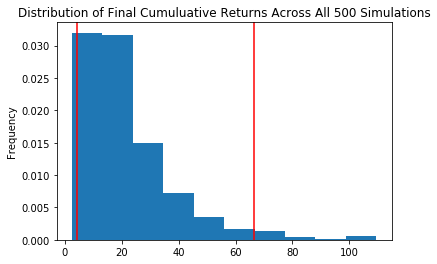

In [20]:
# Plot probability distribution and confidence intervals
MC_30years.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             22.149733
std              16.268641
min               2.526215
25%              11.363579
50%              17.389220
75%              28.466167
max             109.448527
95% CI Lower      4.172355
95% CI Upper     66.664239
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics[8]*initial_investment, 2)

ci_upper = round(summary_statistics[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83447.1 and $1333284.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_statistics[8]*initial_investment, 2)

ci_upper = round(summary_statistics[9]*initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125170.66 and $1999927.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, with adjusted portfolio split

MC_5years = MCSimulation(
portfolio_data=df_stock_data, 
    weights=[0.2,0.8],
    num_simulation=500,
    num_trading_days=252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/macbookpro15/Fintech_Material/monu-virt-fin-pt-08-2021-u-c/02-Homework/05-APIs/Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983951,0.991729,1.010713,0.997881,1.023132,0.995497,0.993783,0.997709,1.002444,1.011162,...,0.995257,1.003164,0.995457,1.013546,1.007713,1.003874,0.994961,1.011976,0.998542,0.984553
2,0.996408,1.003675,1.002405,1.000107,1.021904,0.968100,1.012215,0.991881,0.987508,1.005391,...,1.004847,0.999816,1.010486,1.009789,1.006354,1.010772,0.986341,1.009994,0.987366,0.972471
3,0.985169,0.999234,0.995752,1.010333,1.029140,0.969554,1.017680,1.006577,0.987676,0.997003,...,1.022924,1.014076,1.005598,1.022109,1.011324,0.992945,0.982601,1.016823,0.978683,0.973284
4,0.985907,0.993586,1.010735,0.985526,1.038284,0.961377,1.025820,1.008105,0.983395,1.001648,...,1.027319,1.004428,1.016185,1.012428,1.007275,1.000027,0.982473,1.007942,0.983924,0.936637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.652724,1.681803,1.013633,3.151919,1.275060,1.785592,2.704585,2.090914,2.414553,1.784366,...,2.797915,1.700243,2.869507,1.188850,2.463138,1.609091,2.456560,1.582253,1.474848,0.964257
1257,2.653202,1.672788,1.017403,3.193674,1.274656,1.783588,2.636182,2.095410,2.398849,1.788872,...,2.769336,1.701572,2.858919,1.169482,2.486918,1.599446,2.426485,1.588571,1.495115,0.973430
1258,2.632280,1.693480,1.020407,3.219252,1.275782,1.778588,2.674336,2.073719,2.378244,1.821118,...,2.727081,1.705094,2.842803,1.184695,2.501376,1.580234,2.460382,1.600207,1.503762,0.968069
1259,2.653195,1.687785,1.023546,3.210085,1.286861,1.768640,2.655654,2.053674,2.373247,1.845386,...,2.680811,1.694090,2.878248,1.172350,2.509031,1.592295,2.453828,1.589234,1.494320,0.979436


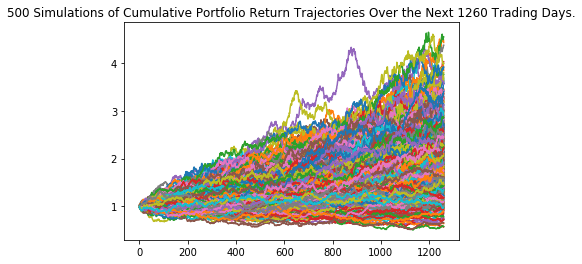

In [34]:
# Plot simulation outcomes
MC_5years.plot_simulation()

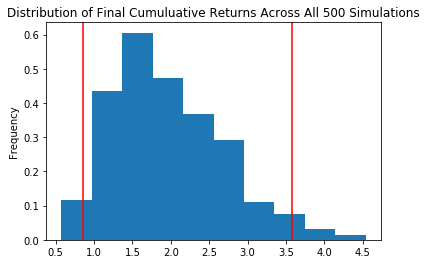

In [35]:
# Plot probability distribution and confidence intervals
MC_5years.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_5years.summarize_cumulative_return()

# Print summary statistics for 5 year returns
print(summary_statistics)

count           500.000000
mean              1.960908
std               0.718429
min               0.575173
25%               1.418188
50%               1.859763
75%               2.426699
max               4.540347
95% CI Lower      0.858675
95% CI Upper      3.575947
Name: 1260, dtype: float64


In [42]:
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_statistics[8]*initial_investment, 2)

ci_upper_five = round(summary_statistics[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51520.49 and $214556.8


### Ten Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with only Crypto
crypto_acc = my_btc_value + my_eth_value

crypto_df = pd.DataFrame(my_btc_value + my_eth_value, columns = ["amount"], index = [1])

MC_30years = MCSimulation(
portfolio_data=crypto_df, 
    weights=[0.4,0.6],
    num_simulation=500,
    num_trading_days=252*10
)


IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")